In [1]:
import pandas as pd
import numpy as np
# Helper function to load data from CSV
def load_data_from_csv(csv_file):
    # Read the CSV into a DataFrame
    df = pd.read_csv(csv_file)

    # Assuming the CSV has columns like 'id', 'label', and other features
    return df

# Path to the CSV file
csv_file = './Cancer_Data.csv'  # Replace with your actual CSV path

# Load the data from the CSV file into a DataFrame
df = load_data_from_csv(csv_file)

# Example of viewing the data
print(df.head())
print(f'DataFrame Size: {df.shape}')

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [2]:
import pandas as pd

# Assuming df is your DataFrame
# Load your DataFrame (for illustration)
# df = pd.read_csv('your_file.csv')  # Uncomment this to load your actual data

# Drop the unnamed column
df.drop(columns=['Unnamed: 32'], inplace=True)

# Alternatively, if you want to drop any unnamed columns automatically
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display the updated DataFrame information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Replace 'b' with 0 and 'm' with 1
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})
# Step 2: Convert the column to float
df['diagnosis'] = df['diagnosis'].astype(float)

C:\Users\Andrei Olar\AppData\Local\Temp\ipykernel_15024\2809301025.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    float64
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
print(df.head())

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        1.0        17.99         10.38          122.80     1001.0   
1    842517        1.0        20.57         17.77          132.90     1326.0   
2  84300903        1.0        19.69         21.25          130.00     1203.0   
3  84348301        1.0        11.42         20.38           77.58      386.1   
4  84358402        1.0        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

In [7]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# Step 2: Convert all columns to float to ensure consistency in numeric representation
df = df.astype(float)

# Step 3: Remove Dx columns from features (X) and use them as labels (y)
label_cols = df["diagnosis"]
y = df["diagnosis"]  # Labels (Dx column only)
X = df.drop(columns=['diagnosis'])  # Features, excluding 'diagnosis'

# Step 4: Define numeric columns (all columns are numeric now)
numeric_cols = X.columns  # All remaining columns in X are numeric

# Define numeric transformer (impute and scale)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Replace missing numeric data with median
    ('scaler', StandardScaler())  # Scale the numeric data
])

# Step 5: Apply the transformation to numeric columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Step 6: Build a pipeline that preprocesses and trains the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', RandomForestClassifier(random_state=42))  # Train Random Forest model
])



In [8]:
# Step 4: Split the data into features (X) and multi-label target (y)



# Display the shapes to verify
print("Features (X) shape:", X.shape)
print("Targets (y) shape:", y.shape)
print(y.info())
print(X.info())

Features (X) shape: (569, 31)
Targets (y) shape: (569,)
<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype  
--------------  -----  
569 non-null    float64
dtypes: float64(1)
memory usage: 4.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 n

In [9]:
# Step 5: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Verify columns in X
print("Columns in X:", X.columns)
print("Numeric columns in transformer:", numeric_cols)


Columns in X: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Numeric columns in transformer: Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'c

Model accuracy: 0.9649


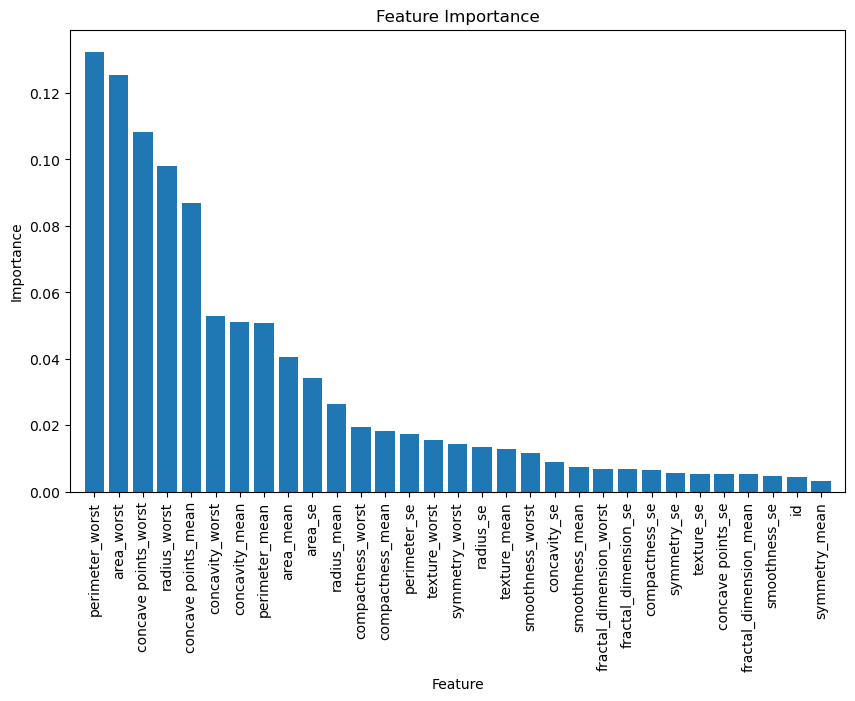

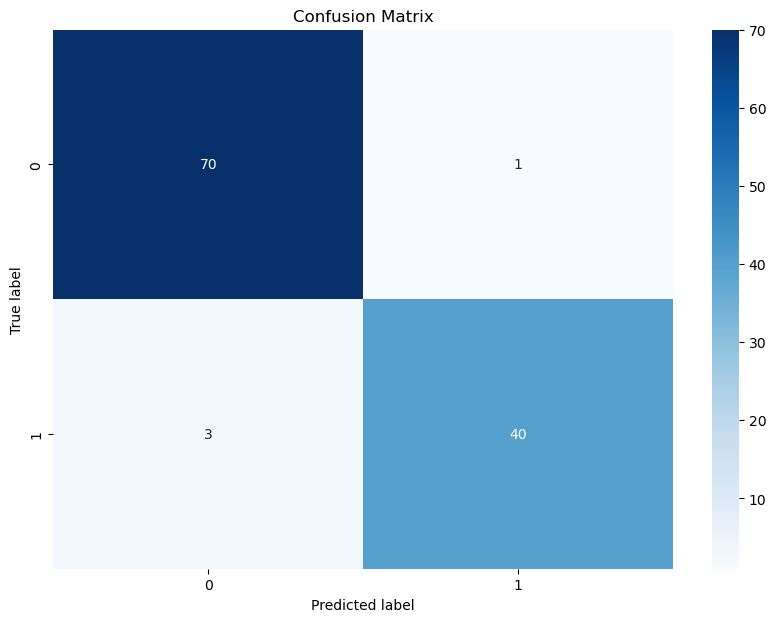

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Model accuracy: 0.9649


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you already have your DataFrame 'df' ready and 'X' and 'y' defined
# Example: X = df.drop(columns=['dx']), y = df['dx']

# Split the data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline that preprocesses the data and fits a RandomForest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', RandomForestClassifier(random_state=42))  # Train Random Forest model
])

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.4f}')

# Step 10: Feature Importance Visualization
# Access the classifier from the pipeline
classifier = model.named_steps['classifier']

# Get feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = np.array(X.columns)[indices]  # Make sure features is an array

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# Step 11: Confusion Matrix
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)  # For single-label classification
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Step 12: Classification Report
report = classification_report(y_test, y_pred)  # No need for target_names for binary/multi-class
print(report)
print(f'Model accuracy: {accuracy:.4f}')


Model accuracy (before dropping features): 0.9649
Model accuracy (after dropping features): 0.9649


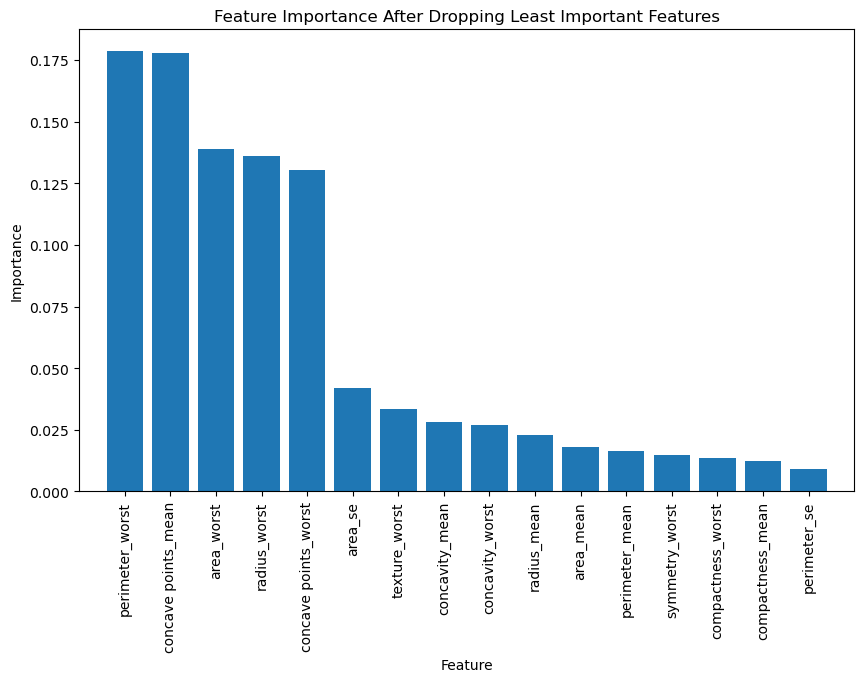

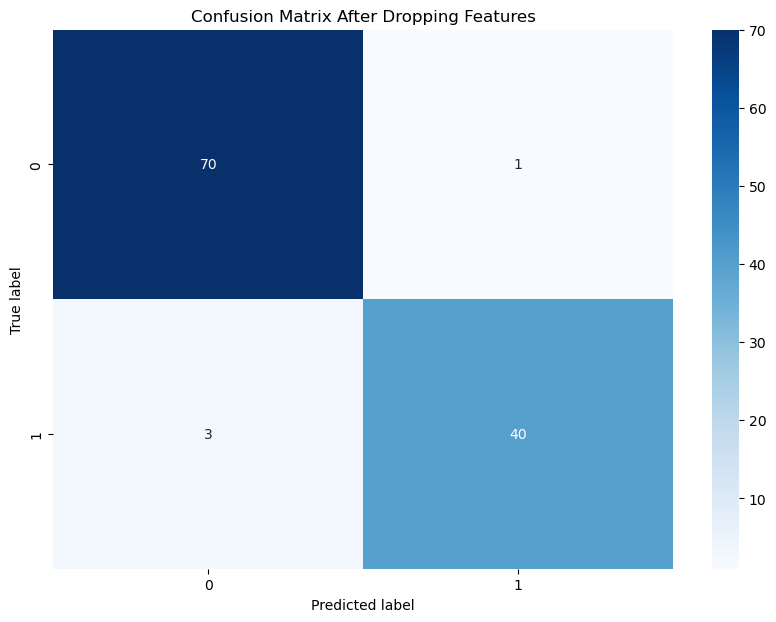

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        71
         1.0       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Model accuracy (after dropping features): 0.9649


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you already have your DataFrame 'df' ready and 'X' and 'y' defined
# Example: X = df.drop(columns=['dx']), y = df['dx']

# Split the data into training and testing sets (if not done already)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a pipeline that preprocesses the data and fits a RandomForest model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing steps
    ('classifier', RandomForestClassifier(random_state=42))  # Train Random Forest model
])

# Step 8: Train the model
model.fit(X_train, y_train)

# Step 9: Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Model accuracy (before dropping features): {accuracy:.4f}')

# Step 10: Feature Importance Visualization
# Access the classifier from the pipeline
classifier = model.named_steps['classifier']

# Get feature importances
importances = classifier.feature_importances_
indices = np.argsort(importances)  # Indices sorted in ascending order
features = np.array(X.columns)  # Ensure features is an array

# Drop the 15 least important features
least_important_indices = indices[:15]
X_dropped = X.drop(columns=features[least_important_indices])

# Split the modified dataset into training and testing sets
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(
    X_dropped, y, test_size=0.2, random_state=42
)

# Re-define the preprocessor for the new feature set
preprocessor_dropped = ColumnTransformer(
    transformers=[
        # Apply StandardScaler to numerical features
        ('num', StandardScaler(), X_dropped.select_dtypes(include=['int64', 'float64']).columns.tolist()),
        # Apply SimpleImputer to categorical features
        ('cat', SimpleImputer(strategy='most_frequent'), X_dropped.select_dtypes(include=['object']).columns.tolist()),
    ],
    remainder='passthrough'  # Keep other columns if any (although none should be left after dropping)
)

# Build and train the new model with the modified features
model_dropped = Pipeline(steps=[
    ('preprocessor', preprocessor_dropped),  # Apply preprocessing steps for the new dataset
    ('classifier', RandomForestClassifier(random_state=42))  # Train Random Forest model
])

# Step 11: Train the new model
model_dropped.fit(X_train_dropped, y_train_dropped)

# Step 12: Evaluate the new model
accuracy_dropped = model_dropped.score(X_test_dropped, y_test_dropped)
print(f'Model accuracy (after dropping features): {accuracy_dropped:.4f}')

# Step 13: Feature Importance Visualization for the new model
classifier_dropped = model_dropped.named_steps['classifier']
importances_dropped = classifier_dropped.feature_importances_
indices_dropped = np.argsort(importances_dropped)[::-1]
features_dropped = np.array(X_dropped.columns)[indices_dropped]

# Plot feature importance for the new model
plt.figure(figsize=(10, 6))
plt.title('Feature Importance After Dropping Least Important Features')
plt.bar(range(X_dropped.shape[1]), importances_dropped[indices_dropped], align='center')
plt.xticks(range(X_dropped.shape[1]), features_dropped, rotation=90)
plt.xlim([-1, X_dropped.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

# Step 14: Confusion Matrix for the new model
y_pred_dropped = model_dropped.predict(X_test_dropped)

# Generate confusion matrix
cm_dropped = confusion_matrix(y_test_dropped, y_pred_dropped)  # For single-label classification
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dropped, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix After Dropping Features')
plt.show()

# Step 15: Classification Report for the new model
report_dropped = classification_report(y_test_dropped, y_pred_dropped)  # No need for target_names for binary/multi-class
print(report_dropped)
print(f'Model accuracy (after dropping features): {accuracy_dropped:.4f}')
